In [21]:
import os
import pathlib

import rasterio
from rasterio.windows import Window

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [3]:
DATASET = pathlib.Path("/media/sambhav/30AC4696AC46568E/datasets/inaria")

TRAIN_IMAGES = DATASET / "train" / "images"
TRAIN_MASKS = DATASET / "train" / "gt"

TEST_IMAGES = DATASET / "test" / "images"

In [46]:
img_path = next(TRAIN_IMAGES.iterdir()).as_posix()
mask_path = next(TRAIN_MASKS.iterdir()).as_posix()

In [8]:
with rasterio.open(img_path) as raster:
    xsize, ysize = 512, 512
    xoff, yoff = 0, 0
    
    crop = rasterio.windows.Window(xoff, yoff, xsize, ysize)
    transform = raster.window_transform(crop)

    profile = raster.profile
    profile.update({
        'height': xsize,
        'width': ysize,
        'transform': transform
    })

    with rasterio.open('./output.tif', 'w', **profile) as cropped:
        cropped.write(raster.read(window=crop))

In [47]:
test_raster = rasterio.open(img_path)
test_mask = rasterio.open(mask_path)

In [60]:
print(test_raster)
print(test_mask)

<open DatasetReader name='/media/sambhav/30AC4696AC46568E/datasets/inaria/train/images/austin1.tif' mode='r'>
<open DatasetReader name='/media/sambhav/30AC4696AC46568E/datasets/inaria/train/gt/austin1.tif' mode='r'>


In [67]:
window = Window(2500, 2000, 224, 224)
window

Window(col_off=2500, row_off=2000, width=224, height=224)

In [68]:
img = np.moveaxis(test_raster.read(window = window), 0, -1)
mask = np.moveaxis(test_mask.read(window = window), 0, -1)

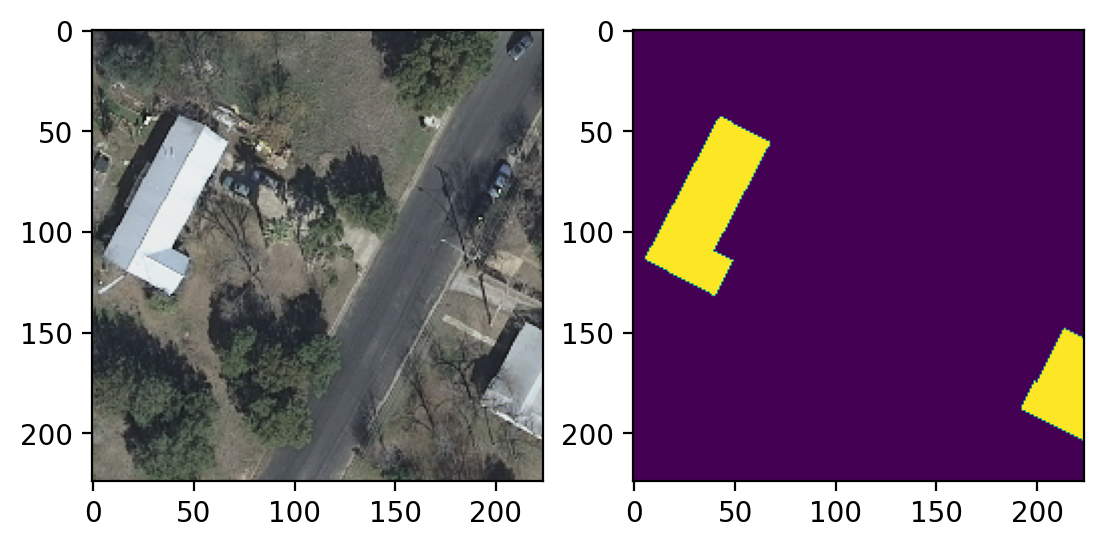

In [69]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.set_dpi(200)

ax1.imshow(img)
ax2.imshow(mask)